In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings

warnings.simplefilter('ignore')

In [12]:
df_org = pd.read_csv("/content/burger-king-menu V2.csv", encoding='latin-1')

In [13]:
df = pd.read_csv("/content/burger-king-menu V2.csv", encoding='latin-1')
df.drop('Item', axis=1, inplace=True)

In [14]:
df.drop('Clusters', axis=1, inplace=True)

In [15]:
df.head()

,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Category
0,40,30,3.5,2.0,0.0,10,180,1.0,0.0,0.0,2.0,Additional Options
1,10,0,0.0,0.0,0.0,0,125,3.0,0.0,2.0,0.0,Additional Options
2,80,80,9.0,0.5,0.0,10,75,1.0,0.0,0.0,0.0,Additional Options
3,25,0,0.0,0.0,0.0,0,0,7.0,0.0,6.0,0.0,Additional Options
4,90,0,0.0,0.0,0.0,0,25,24.0,0.0,17.0,0.0,Additional Options


In [16]:
df['Category'].unique()

array(['Additional Options', 'Beverage', 'BK Cafe', 'Breakfast',
       'Burgers', 'Chicken & More', 'Desserts', 'Salads & Sides'],
      dtype=object)

In [17]:
df_Ad = df[df['Category']=='Additional Options']

In [18]:
dfs = {}

# Split data based on unique values in the 'Category' column
for val in df['Category'].unique():
    dfs[f'df_{val}'] = df[df['Category'] == val]

In [19]:
for key, dafr in dfs.items():
  dafr.drop('Category', axis=1, inplace=True)
  # print(dafr)

In [20]:
print(key)

df_Salads & Sides


In [21]:
dfs_scale = {}

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
for key, dfr in dfs.items():
  dfs_scale[f'{key}_scale'] = scaler.fit_transform(dfr)
  # Convert the result back to a DataFrame
  dfs_scale[f'{key}_scale']  = pd.DataFrame(dfs_scale[f'{key}_scale'], columns=dfr.columns)

# # Display the standardized DataFrame
# print(df_standardized)

In [22]:
for key, dafs in dfs_scale.items():
    wcss = []  # Define wcss inside the loop
    for i in range(1, 10):  # Try different numbers of clusters from 1 to 5
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
        kmeans.fit(dafs)
        wcss.append(kmeans.inertia_)  # Inertia attribute gives WCSS value
    print(f'{key} - {wcss}')


df_Additional Options_scale - [90.0, 46.514350318776934, 33.100117220790395, 23.3433531058898, 13.730023832079995, 8.316322365748853, 4.3764213717306255, 2.0664449328301604, 0.9471901063939844]
df_Beverage_scale - [423.0, 217.07365657277012, 100.70546904144845, 68.20303860365428, 38.21718478194147, 30.095535169049917, 21.246064274226278, 17.154718729747714, 13.715564828121108]
df_BK Cafe_scale - [119.99999999999999, 19.043775949601986, 8.317035122587704, 4.723966033044326, 1.9642891951547778, 0.9646983120497015, 5.9164567891575885e-31, 5.9164567891575885e-31, 2.9582283945787943e-31]
df_Breakfast_scale - [253.0, 156.19600813928406, 115.43773762718592, 87.19693077328674, 59.35312871088953, 45.42162240257205, 37.63167228870207, 31.228547433597896, 26.427926698971703]
df_Burgers_scale - [231.0, 88.89881997483367, 44.35840735842429, 28.907377820756203, 19.546505179400956, 14.091719137043167, 9.601988797380805, 7.275588321208355, 5.364617602983156]
df_Chicken & More_scale - [170.0, 66.093983

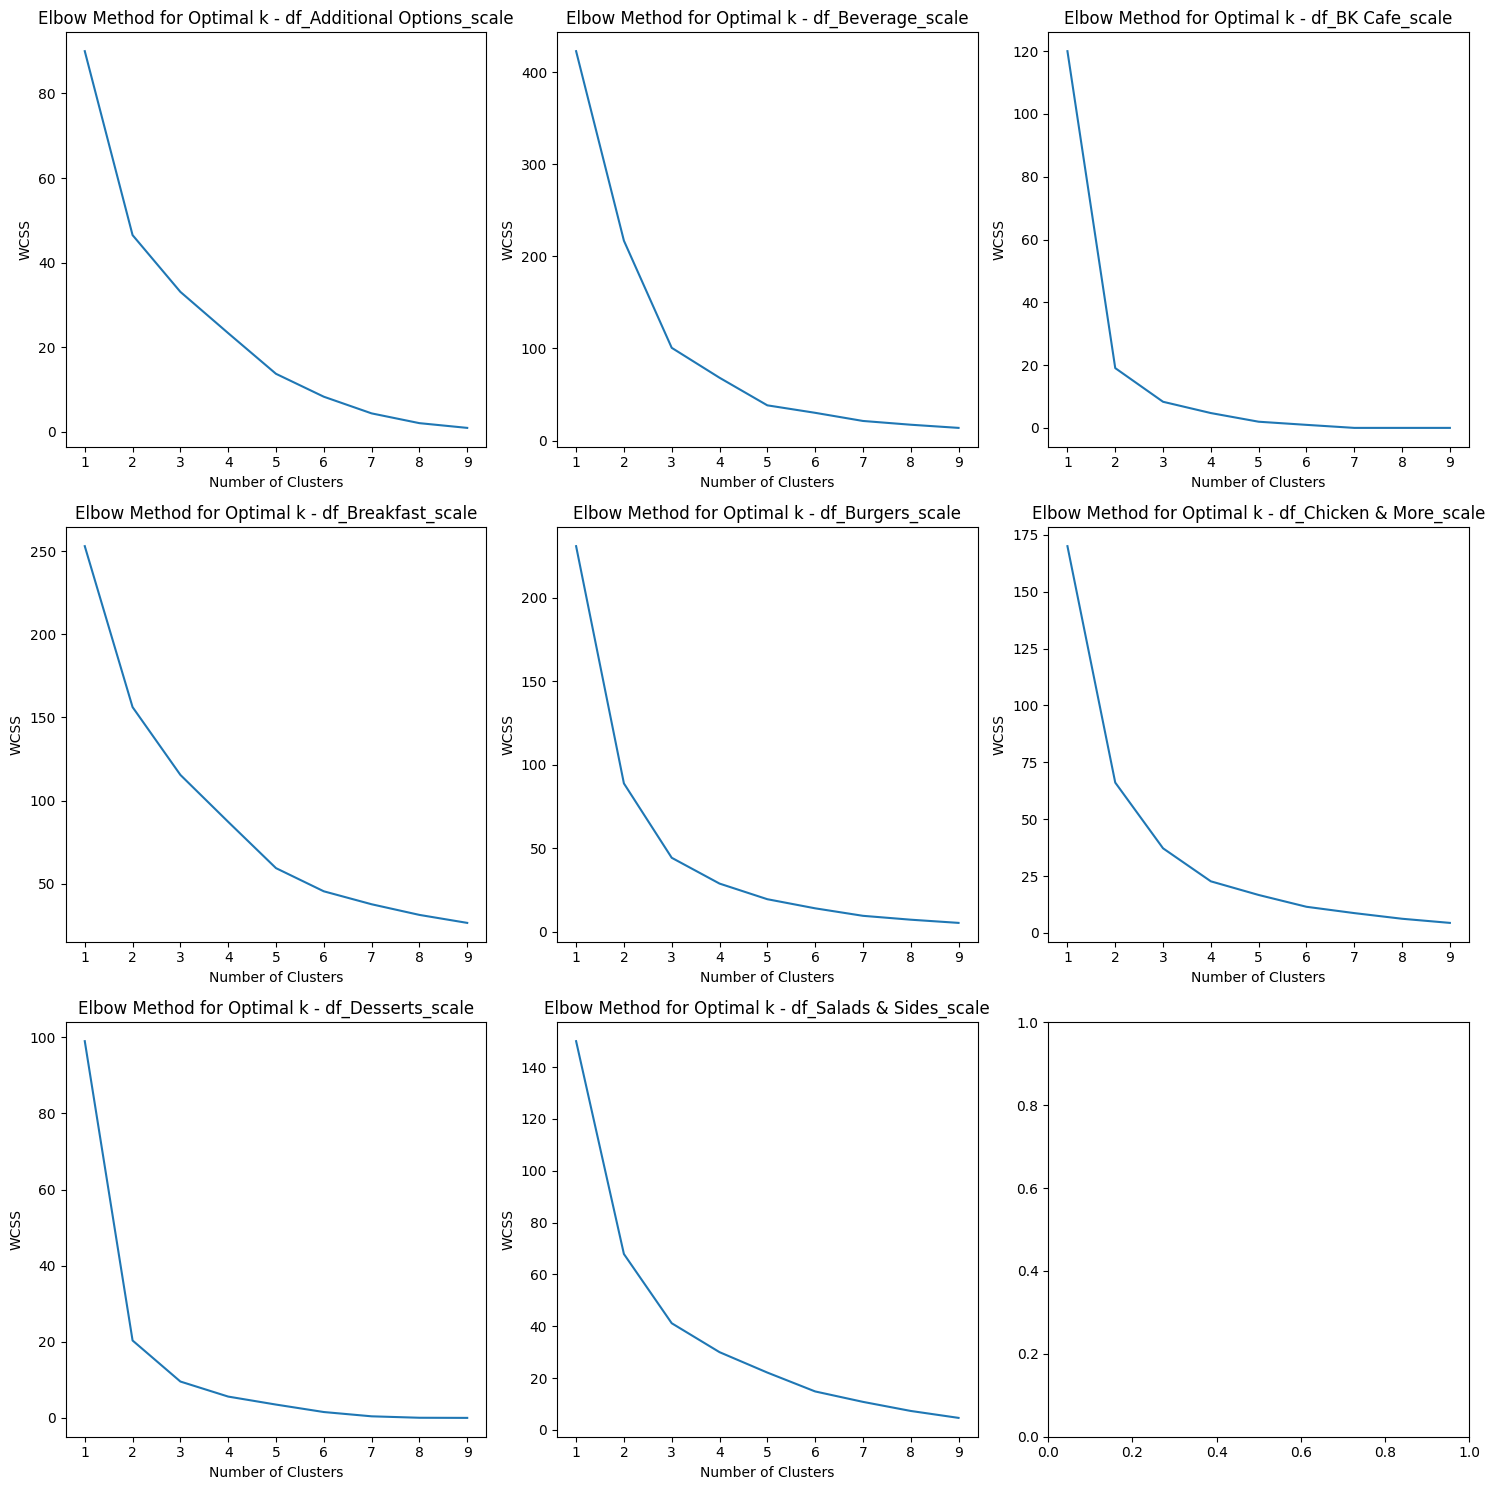

In [23]:
num_plots = 8
num_cols = 3  # Number of columns for subplots
num_rows = 3  # Calculate the number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axs array if it's not already 1-dimensional
if num_plots == 1:
    axs = [axs]

for idx, (key, dafs) in enumerate(dfs_scale.items()):
    wcss = []  # Define wcss inside the loop
    for i in range(1, 10):  # Try different numbers of clusters from 1 to 5
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
        kmeans.fit(dafs)
        wcss.append(kmeans.inertia_)  # Inertia attribute gives WCSS value

    row = idx // num_cols
    col = idx % num_cols
    axs[row][col].plot(range(1, 10), wcss)
    axs[row][col].set_title(f'Elbow Method for Optimal k - {key}')  # Add DataFrame key to title
    axs[row][col].set_xlabel('Number of Clusters')
    axs[row][col].set_ylabel('WCSS')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [24]:
dfs_scale['df_BK Cafe_scale']

,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g)
0,-0.951872,-0.961074,-0.962659,-0.951439,0.0,-0.963338,-0.934175,-0.945721,-0.534522,-0.955718,-0.92582
1,-0.951872,-0.961074,-0.962659,-0.951439,0.0,-0.963338,-0.934175,-0.945721,-0.534522,-0.955718,-0.92582
2,-0.951872,-0.961074,-0.962659,-0.951439,0.0,-0.963338,-0.934175,-0.945721,-0.534522,-0.955718,-0.92582
3,-0.951872,-0.961074,-0.962659,-0.951439,0.0,-0.963338,-0.934175,-0.945721,-0.534522,-0.955718,-0.92582
4,-0.951872,-0.961074,-0.962659,-0.951439,0.0,-0.963338,-0.934175,-0.945721,-0.534522,-0.955718,-0.92582
5,-0.951872,-0.961074,-0.962659,-0.951439,0.0,-0.963338,-0.934175,-0.945721,-0.534522,-0.955718,-0.92582
6,0.336376,0.506748,0.527910,0.432472,0.0,0.557722,0.245836,0.315240,-0.534522,0.382287,0.00000
7,0.765791,0.926126,0.900552,0.778450,0.0,0.861934,0.639173,0.675515,-0.534522,0.764574,0.92582
8,1.281090,1.345504,1.459515,1.470406,0.0,1.470358,1.032509,1.095836,-0.534522,1.210576,0.92582
9,0.594025,0.506748,0.527910,0.432472,0.0,0.557722,0.639173,0.675515,1.069045,0.637145,0.92582


# Clustering for each category

## Additional Options

In [33]:
km1 = KMeans(n_clusters=1, init='k-means++', max_iter=1000)
pred = km1.fit_predict(dfs_scale['df_Additional Options_scale'])

In [34]:
df_org.loc[df_org['Category'] == 'Additional Options', 'Pred'] = pred
df_org[df_org['Category']=='Additional Options'].to_csv('Additional Options.csv')

## Beverage

In [35]:
km1 = KMeans(n_clusters=4, init='k-means++', max_iter=1000)
pred = km1.fit_predict(dfs_scale['df_Beverage_scale'])

In [36]:
df_org.loc[df_org['Category'] == 'Beverage', 'Pred'] = pred
df_org[df_org['Category']=='Beverage'].to_csv('Beverage.csv')

## BK Cafe

In [37]:
km1 = KMeans(n_clusters=4, init='k-means++', max_iter=1000)
pred = km1.fit_predict(dfs_scale['df_BK Cafe_scale'])

In [38]:
df_org.loc[df_org['Category'] == 'BK Cafe', 'Pred'] = pred
df_org[df_org['Category']=='BK Cafe'].to_csv('BK Cafe.csv')

## Salads & Sides

In [39]:
km1 = KMeans(n_clusters=7, init='k-means++', max_iter=1000)
pred = km1.fit_predict(dfs_scale['df_Salads & Sides_scale'])

In [40]:
df_org.loc[df_org['Category'] == 'Salads & Sides', 'Pred'] = pred
df_org[df_org['Category']=='Salads & Sides'].to_csv('Salads & Sides.csv')

## Breakfast

In [41]:
km1 = KMeans(n_clusters=6, init='k-means++', max_iter=1000)
pred = km1.fit_predict(dfs_scale['df_Breakfast_scale'])

In [42]:
df_org.loc[df_org['Category'] == 'Breakfast', 'Pred'] = pred
df_org[df_org['Category']=='Breakfast'].to_csv('Breakfast.csv')

## Burgers

In [43]:
km1 = KMeans(n_clusters=4, init='k-means++', max_iter=1000)
pred = km1.fit_predict(dfs_scale['df_Burgers_scale'])

In [44]:
df_org.loc[df_org['Category'] == 'Burgers', 'Pred'] = pred
df_org[df_org['Category']=='Burgers'].to_csv('Burgers.csv')

## Chicken and More

In [45]:
km1 = KMeans(n_clusters=6, init='k-means++', max_iter=1000)
pred = km1.fit_predict(dfs_scale['df_Chicken & More_scale'])

In [46]:
df_org.loc[df_org['Category'] == 'Chicken & More', 'Pred'] = pred
df_org[df_org['Category']=='Chicken & More'].to_csv('Chicken & More.csv')

## Desserts

In [47]:
km1 = KMeans(n_clusters=3, init='k-means++', max_iter=1000)
pred = km1.fit_predict(dfs_scale['df_Desserts_scale'])

In [48]:
df_org.loc[df_org['Category'] == 'Desserts', 'Pred'] = pred
df_org[df_org['Category']=='Desserts'].to_csv('Desserts.csv')